In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
# Define the transformations to apply to the images
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
img_size=227
Batch_size=64
# Load the dataset and split it into training and test sets
data_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Datasets/Mixed/Photos Capstone',
    target_size=(img_size, img_size),
    batch_size=Batch_size,
    class_mode='categorical'
)

# Initialize empty arrays to hold the images and labels
X = np.empty((0, img_size, img_size, 3))
y = np.empty((0, 5))

# Iterate over the entire dataset
for x, label in data_generator:
    # Concatenate the images and labels to the arrays
    X = np.concatenate((X, x))
    y = np.concatenate((y, label))
    # Break the loop when all images have been processed
    if len(X) == data_generator.n:
        break
        
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Found 5068 images belonging to 5 classes.


KeyboardInterrupt: ignored

In [ ]:
# Define the AlexNet model
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),#Normalization
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=Batch_size, validation_data=(X_test, y_test))


Epoch 1/50
64/64 [==============================] - 100s 2s/step - loss: 8.0642 - accuracy: 0.6004 - val_loss: 30.1253 - val_accuracy: 0.2032
Epoch 2/50
64/64 [==============================] - 91s 1s/step - loss: 0.9352 - accuracy: 0.7854 - val_loss: 9.8356 - val_accuracy: 0.3807
Epoch 3/50
64/64 [==============================] - 91s 1s/step - loss: 0.4850 - accuracy: 0.8557 - val_loss: 2.6711 - val_accuracy: 0.5414
Epoch 4/50
64/64 [==============================] - 91s 1s/step - loss: 0.3925 - accuracy: 0.8742 - val_loss: 3.0931 - val_accuracy: 0.6026
Epoch 5/50
64/64 [==============================] - 91s 1s/step - loss: 0.2886 - accuracy: 0.9139 - val_loss: 4.5266 - val_accuracy: 0.3629
Epoch 6/50
64/64 [==============================] - 91s 1s/step - loss: 0.2946 - accuracy: 0.9070 - val_loss: 3.9247 - val_accuracy: 0.4921
Epoch 7/50
64/64 [==============================] - 92s 1s/step - loss: 0.3233 - accuracy: 0.9068 - val_loss: 6.3365 - val_accuracy: 0.3402
Epoch 8/50
64/64 [

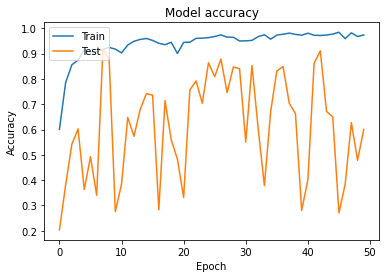

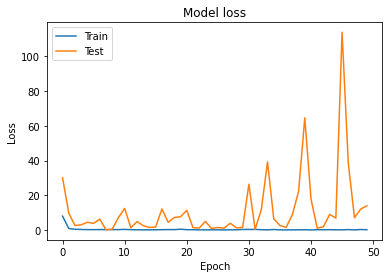

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Models/LeNet_mixed_10_epoch.h5') 

In [ ]:
# from keras.models import load_model
# model = load_model('/content/drive/MyDrive/Models/LeNet_mixed_10_epoch.h5')

In [ ]:
import pathlib
class_names = (data_generator.class_indices)
class_names = list((k) for k,v in class_names.items())
img = pathlib.Path('Testing\\pastel_mandio1.jpg') 

img = tf.keras.utils.load_img(
    img, target_size=(img_size, img_size)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# # print(
# #     "This image most likely belongs to {} with a {:.2f} percent confidence."
# #     .format(class_names[np.argmax(score)], predictions[0])
# # )
# # print(class_names[np.argmax(score)], predictions[0])
# print('Name: ', class_names[np.argmax(score)], 'Conf: ', np.argmax(predictions[0]))
score_index = tf.argmax(predictions[0])
score =  predictions[0, score_index]
print('Class : ' , class_names[score_index], 'Conf: ', score)

1/1 [==============================] - 0s 36ms/step
Class :  Pajagua Conf:  1.0
